# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
# Minimum price of the data
minimum_price = data['MEDV'].min()

# Maximum price of the data
maximum_price = data['MEDV'].max()

# Mean price of the data
mean_price = data['MEDV'].mean()

# Median price of the data
median_price = data['MEDV'].median()

# Standard deviation of prices of the data
std_price = data['MEDV'].std()

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165340.27765266786


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer: **

RM: The average number of rooms in the neighborhood should indicate a higher value of the home, since it is more likely to be a house. Furthermore, a house with many rooms is more likely to be expensive, as each room to rent is worth real market value. As a ballpark, one would expect each room, especially bedrooms (which we don't have data labels on specifically), to add something like 30% to the value of the house. So in short, it will increase the value, but be how much depends on the definition of room and how said rooms are labelled in the data set. Higher RM should correlate with higher home prices.

LSTAT: Economically the more poor, the lower the value of the real estate, as the poor simply cannot afford to live there. One likely exception to this can be certain areas where a particular percentage of the housing is labelled affordable housing. In areas with affordable housing, there may be a legally mandated percentage of lower class workers living there cheaply on subsidised housing, and therefore the statistics in these areas may be misleading, as the value of the property may be high though the tentent is there on under-market rate rents. In such situations the LSAT may not be as an effective a predictor as it is in other areas. In general, low LSTAT should indicate higther median home prices.

PTRATIO: I am assuming that this is referring to parent to teach ratios at public schools. These are a fairly good indicator of wealth, as richer school districts can afford to have more teachers per student, which is desirable as it is strongly correlated to things like children's grades and admission to top universities. As such, a lower RTRATIO should yield higher median home prices.

The below plots (median home price on x axis) show roughly linear trend lines for PTRATIO and RM, though PTRATIO has a large variance and some outliers to the trend. LSTAT seems to be bi-modal, made up of roughly 2 primary distributions, one above 600k, and one below 600k median price.

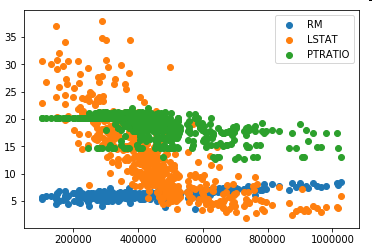

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [3]:
# Import 'r2_score'
# REF MATH: https://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination
# note that the math is for 2 variables, yet we only define a single variable in our example
# REF CODE: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html 
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true ,y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [4]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:**

A R2 score of 0.923 is pretty good. 

That means that the more than 92% of the variance in the dependent variable that is predictable from the independent variable. In our case greater than 92 percent of the true variable variance is predicted by our estimation (where our estimation of the true underlying state is based on measurements somehow related to the real state). 

However, for this example, the size of the sample arrays are small (5), hence variance as a statistic is not very accurate. A sample size greater than 100 would inspire more confidence.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.model_selection` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X = np.array(data[['RM', 'LSTAT', 'PTRATIO']])
y = np.array(data['MEDV'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: **

Splitting the data set into a testing an training set is essential.

Overfitting describes a model that fits perfectly to examples it has seen, but fits poorly to examples it has never seen before. This was a big problem in the early days of Neural Networks, before techniques like regularization, and test-train splits, were common place. These overfitted neural networks were seen as "brittle", and made experts pessimistic about their prospects. 

To limit the chance of overfit, we want to, among other things, have a special section of data that is never used for training. This is called a test, a data set that the model has never seen before. If it can work well on the test and as the training set, then it is a strong indication that we have a good model that is well trained. As such, performance against the test set it used to ensure we have not overfitted.

Underfitting is usually the result of having not enough data to train the appropriate model (hence the advantage of things like data augmentation), or that the model is too simple, too complex (such as fitting a high order polynomial to a linear funtion), or in-appropriate in others ways so that it cannot well shape or fit itself to the data provided. Therefore, the model will not perform well even on the training set on which is has attempted to learn.

If the model is "just-right" is should neither under-fit nor over-fit, and hence perform well on both the test set and the training set.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

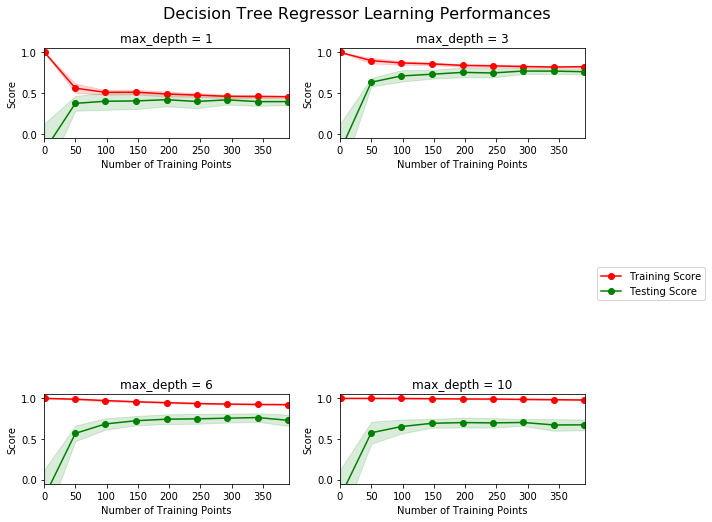

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: **

"Choose one of the graphs above and state the maximum depth for the model. "
--> The graph in the top right corner, wi5th max_depth = 3

"What happens to the score of the training curve as more training points are added? What about the testing curve?"
--> For max depth = 3, the training curve and testing curve both converge to around 0.8

"Would having more training points benefit the model? "
--> Probably not. After around 300 both the training and test curves seems to plateau.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

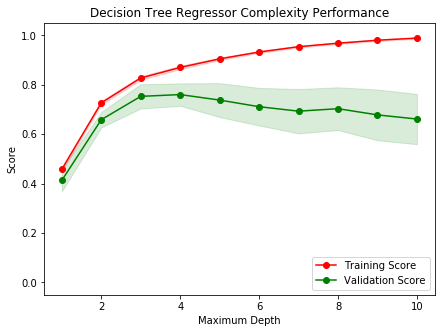

In [7]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: **

"When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance?"
--> High bias. Since the training score is not good and does not increase as more points are added, it is suggestive of suffering from high bias. 

"How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?"
--> In this case the there is a large gap between the good training score and the poor test score. This suggests overfitting as the model cannot generalise well to the data in the test set. 

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: **

"Which maximum depth do you think results in a model that best generalizes to unseen data? "
--> 4

"What intuition lead you to this answer?"
--> The answer above for Question-5 "Bias-Variance Tradeoff" also aligns with the complexity curve. Here the validation score peaks at a depth of around 4 (hence poor complexity performance for model depth 1), and variance (lighter green area around the dark green mean) increases as the depth increases (hence large variance for model depth 10). 

In model depth 3 we have good convergence of both training and test curves, and in model depth 6 we have some divergence of test and training curves, but better performance on the test set. The plots of training-test learning curves, combined with the complexity graph, indicate a sweet-spot trade off between test set performance and training set performance at a model depth of 4.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: **

The "grid" represents the search space of the model, akin to degrees of freedom or ways in which the model can move. A model based on these "hyper-parameters" are the things that have to be trained and tested against. For example, a hyper parameter of a decision tree is depth, for a neural network can be the number of hidden layers, and for a polynomial the degree of the polynomial.

To test how well these parameters are working, the model can be executed with these parameters in place, and its predictive power compared against the results of a test set as ground truth. The results of the model prediction against the test set are often compared staticially with things like recall, precision, F1 (harmonic mean based), F-Beta score (weighted F1 score), ROC TP/FP cuves, and R2 scores.

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: **

"What is the k-fold cross-validation training technique?"
--> This refers to the approach of (ideally randomizing then) breaking up the data into k buckets, training k times, and averaging results to get a final model. From the k buckets/subsamples, a single bucket/subsample is retained as validation data for testing, while the remaining k - 1 buckets/subsamples are used for training. This techinique is referred to as a type of "out of order sampling" or "rotation estimation". 

Because the results of all k-1 trained models are averaged, the chance that overfitting is reduced as it is unlikley that an over-fitted model will perform well on a test set and all of the training sets. In other words, to perform well on many different training sets and the final test set the model has have general predictive power than is independent of one particular data set.

When adjusting a model without the k buckets in k-fold cross-validation, there is the risk that the training process can become corrupted as we keep training and tweaking and tuning until we do well on the test set. This is a kind of "knowledge leak" that indirectly imparts knowledge of the test set into the model. This increases the of overfitting, and means that the model may no longer generalize well to data outside of the test set. Therefore it is important to randomize both the data and the training process to help to remove any chance of that the data or the training process and its ordering will introduce bias. 

In addition to, or instead of, k-fold cross-validation, yet another part of the dataset can be held out as "validation set". After training, the model is compared against the validation set, then finally against the test set, and has to perform well against both. However, only the validation set performance can be used for model selection and choice of hyper-parameters. The test set must be left isolated from model selection, least it become corrupted as described above.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.20/modules/generated/sklearn.model_selection.GridSearchCV.html) from `sklearn.model_selection` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [8]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, parameters, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [9]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: **

The maximum depth of the optimal model is 4. As I predicted in analysis above in question 6. 

It is reassuring that the results of the optimal model from fit_model match that indicated by prior analysis.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [10]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


**Answer: **

Predicted selling price for Client 1's home: 403,025.00

Predicted selling price for Client 2's home: 237,478.72

Predicted selling price for Client 3's home: 931,636.36

There prices seem reasonable given the values for the respective features.

Client 1 seems to have an average property, and gets an average selling price. Client 2 has a lot of poverty and a high student to teacher ratio, which make high selling prices unlikely. Client 3 has good scores in all 3 categories, so it makes sense to have a high expected selling price. The results make sense given a graph of the statistics for Boston properties, and fit general common sense.

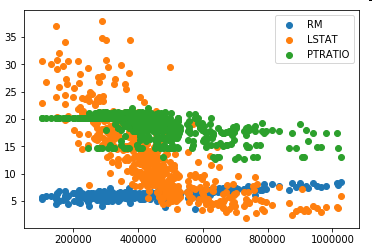

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [11]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: **

Data collected in 1978 is better than nothing, but hardly applicable to 2018. Some trends will likely be there, like number of rooms, proverty level, and parent to teach ratios, however, these correleations will unlikely to have the same values as before, and it seems reasonable to assume that a model trained on 1978 data, even after being adjusted for inflation, could perform well on a modern 2018 data set. Likely the variance on the prediction vs. truth will be much greater than if applied on 1978 data directly.

The features provided in the data set are not really sufficient to fully describe a home. Actually, it would be good to include many more features, such as plot area of the land on which the dwelling is built in the case homes. Something like the square ft of all the area under roof, plus yard, seems like relevant information. The presence of a pool would likely increase the value of a house also, though other factors like the quality of applicances in a house may be less significant as they can be easily replaced. Crime levels in the area would also likely be quite important. Overall, it would be good to have more features, and then use machine learning to decide which features are important. Once the important features have been selected, the less important features could be pruned from the model to simplify it and make it faster.

A range in prices by itself does not by itself tell us that the model is performing well or poorly. Considering that the range of the total data set is between about 100,000 to 1,100,000, a prediction range of 400,000 is not so surprising. Between the different trails trained with different test-train splits, the range of prices predicted for the test set is fairly consistant at about 400,000, and the variance between the 10 trails seems fairly small, indicating the the model is probably not suffering from overfit. There results match with earlier analysis of Decision Tree Regression Learning Curve and Complexity performance for different max depth, where it was also shown that a max depth of around 4 seems to do well with regards to overfitting and overfitting, i.e. that this max depth, or number of decision to make in the tree, was "just right".

Data in a urban area is unlikely to show the same correlations. For example, the value of land in an urban area is usually worth much more than the value of the home itself (at least for one family homes), whereas in a rural setting, the value of the house may be more than the value of the land. Poverty also likely manifests itself is different ways in rural areas, which tend to have less slums and other bad areas with concentrated crime. An older run down building in rural areas may have a lot of rooms, but actually be worth less than well maintained or newer smaller dwelling. 

It seems fair to use charactistics of the entire neighbourhood to given some kind of min and max guidance for house sales in the area, but not completely determine the value of a house. In the end the market will determine the price it is willing to pay. Each home is unique, and may deviate greatly from those around it. That said, especially in urban area, the value of the land tends to be the driving factor, and the house on top of it less so. In urban areas, there may not be a huge different in the value of the worst house and best house on the street, assuming that they both occupy similar amount of land. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.